# Gradient Descent

In [13]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
def grad(x):
    return 2*x+ 5*np.cos(x)
def cost(x):
    return x**2 + 5*np.sin(x)
def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [15]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


# Stochastic Gradient  Descent

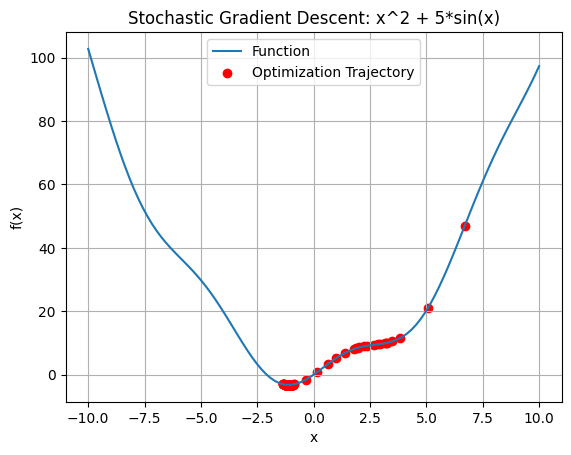

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def function(x):
    return x**2 + 5*np.sin(x)
def derivative(x):
    return 2*x+ 5*np.cos(x)
def gradient_stochastic_descent(learning_rate, num_iterations):
    x = np.random.uniform(-10, 10)  
    trajectory = [x]  
    for _ in range(num_iterations):
        gradient = derivative(x)
        x -= learning_rate * (gradient + np.random.normal(0, 1))

        trajectory.append(x)
    return trajectory
learning_rate = 0.1
num_iterations = 100
trajectory = gradient_stochastic_descent(learning_rate, num_iterations)
x_vals = np.linspace(-10, 10, 100)
y_vals = function(x_vals)
plt.plot(x_vals, y_vals, label='Function')
plt.scatter(trajectory, [function(x) for x in trajectory], c='r', label='Optimization Trajectory')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Stochastic Gradient Descent: x^2 + 5*sin(x)')
plt.grid(True)
plt.show()

# Test mnist with Adam SGD RMSprop Adagrad optimizers

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [19]:
# build model with SGD optimizer method
model_sgd = Sequential()
model_sgd.add(Dense(128, input_shape=(784,), activation='relu'))
model_sgd.add(Dense(10, activation='softmax'))
sgd_optimizer = SGD(learning_rate=0.01)
model_sgd.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [20]:
# build model with Adam optimizer method
model_adam = Sequential()
model_adam.add(Dense(128, input_shape=(784,), activation='relu'))
model_adam.add(Dense(10, activation='softmax'))
adam_optimizer = Adam(learning_rate=0.001)
model_adam.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [21]:
# build model with RMSprop optimizer method
model_RMSprop = Sequential()
model_RMSprop.add(Dense(128, input_shape=(784,), activation='relu'))
model_RMSprop.add(Dense(10, activation='softmax'))
RMSprop_optimizer = RMSprop(learning_rate=0.001)
model_RMSprop.compile(optimizer=RMSprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_RMSprop = model_RMSprop.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [23]:
# build model with Adagrad optimizer method
model_Adagrad = Sequential()
model_Adagrad.add(Dense(128, input_shape=(784,), activation='relu'))
model_Adagrad.add(Dense(10, activation='softmax'))
Adagrad_optimizer = Adagrad(learning_rate=0.001)
model_Adagrad.compile(optimizer=Adagrad_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_Adagrad = model_Adagrad.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [29]:
# Evaluate the model on the test set
accuracy_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)[1]
accuracy_adam = model_adam.evaluate(x_test, y_test, verbose=0)[1]
accuracy_RMSprop = model_RMSprop.evaluate(x_test, y_test, verbose=0)[1]
accuracy_Adagrad = model_Adagrad.evaluate(x_test, y_test, verbose=0)[1]

print(f"Accuracy with SGD: {accuracy_sgd}")
print(f"Accuracy with Adam: {accuracy_adam}")
print(f"Accuracy with SGD: {accuracy_RMSprop}")
print(f"Accuracy with Adagrad: {accuracy_Adagrad}")

Accuracy with SGD: 0.9401999711990356
Accuracy with Adam: 0.9765999913215637
Accuracy with SGD: 0.9772999882698059
Accuracy with Adagrad: 0.9003999829292297


In [27]:
# Get the model's prediction on the test set
y_pred_sgd = model_sgd.predict(x_test)
y_pred_adam = model_adam.predict(x_test)
y_pred_RMSprop = model_RMSprop.predict(x_test)
y_pred_Adagrad = model_Adagrad.predict(x_test)

# Get the index of incorrectly predicted samples
misclassified_sgd = np.where(np.argmax(y_pred_sgd, axis=1) != np.argmax(y_test, axis=1))[0]
misclassified_adam = np.where(np.argmax(y_pred_adam, axis=1) != np.argmax(y_test, axis=1))[0]
misclassified_RMSprop = np.where(np.argmax(y_pred_RMSprop, axis=1) != np.argmax(y_test, axis=1))[0]
misclassified_Adagrad = np.where(np.argmax(y_pred_Adagrad, axis=1) != np.argmax(y_test, axis=1))[0]

313/313 [==============================] - 1s 2ms/step


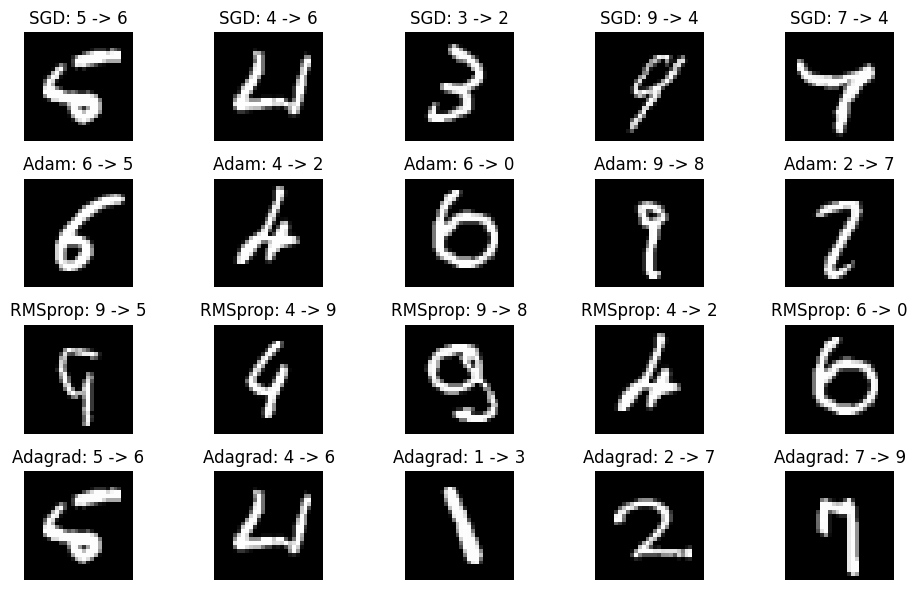

In [28]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[misclassified_sgd[i]].reshape((28, 28)), cmap='gray')
    plt.title(f"SGD: {np.argmax(y_test[misclassified_sgd[i]])} -> {np.argmax(y_pred_sgd[misclassified_sgd[i]])}")
    plt.axis('off')

    plt.subplot(4, 5, i + 6)
    plt.imshow(x_test[misclassified_adam[i]].reshape((28, 28)), cmap='gray')
    plt.title(f"Adam: {np.argmax(y_test[misclassified_adam[i]])} -> {np.argmax(y_pred_adam[misclassified_adam[i]])}")
    plt.axis('off')

    plt.subplot(4, 5, i + 11)
    plt.imshow(x_test[misclassified_RMSprop[i]].reshape((28, 28)), cmap='gray')
    plt.title(f"RMSprop: {np.argmax(y_test[misclassified_RMSprop[i]])} -> {np.argmax(y_pred_RMSprop[misclassified_RMSprop[i]])}")
    plt.axis('off')

    plt.subplot(4, 5, i + 16)
    plt.imshow(x_test[misclassified_Adagrad[i]].reshape((28, 28)), cmap='gray')
    plt.title(f"Adagrad: {np.argmax(y_test[misclassified_Adagrad[i]])} -> {np.argmax(y_pred_Adagrad[misclassified_Adagrad[i]])}")
    plt.axis('off')

plt.tight_layout()
plt.show()